In [1]:
import pandas as pd

df = pd.read_pickle('full_dataset_2.pkl')

df.head()

,acidic_rev,bitter_rev,sweet_rev,umami_rev,spicy_rev,rating,name,minutes,contributor_id,submitted,...,44229138,46779070,53425122,53472027,54670067,57357963,57370186,57501028,92043681,118855872
recipe_id,,,,,,,,,,,,,,,,,,,,,
38,0,0,0,0,0,4.250000,low fat berry blue frozen dessertlow fat berry...,5940.0,6132.0,1999-08-091999-08-091999-08-091999-08-09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39,0,0,0,0,0,3.000000,biryanibiryanibiryanibiryanibiryanibiryanibiry...,6890.0,40742.0,1999-08-291999-08-291999-08-291999-08-291999-0...,...,1.0,0.0,0.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0
40,0,0,0,0,2,4.333333,best lemonadebest lemonadebest lemonadebest le...,210.0,9396.0,1999-09-051999-09-051999-09-051999-09-051999-0...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41,0,0,0,0,0,4.500000,carina s tofu vegetable kebabscarina s tofu ve...,21900.0,23790.0,1999-09-031999-09-031999-09-031999-09-031999-0...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43,0,0,0,0,0,1.000000,best blackbottom piebest blackbottom piebest b...,2100.0,523185.0,1999-08-211999-08-211999-08-211999-08-211999-0...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [2]:
df_train=df[df.columns[df.columns.isin(['acidic_rev','bitter_rev','sweet_rev','umami_rev','spicy_rev','name','minutes','contributor_id','submitted','tags','nutrition','n_steps','steps','description','n_ingredients'])==False]].copy()

In [3]:
from sklearn.model_selection import train_test_split
from scipy.stats import zscore


# Assuming df_train is your dataset and it's already loaded

# Separating features and targets
# Assuming df is your original dataframe and it's already loaded

# Preparing features (excluding 'rating' from features and including only relevant features)
X = df_train.drop(['rating'], axis=1)
# Preparing the target (rating column)
y = df_train['rating']
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Determine the number of input features
n_features = X_train.shape[1]

# Define the model for regression
model = Sequential([
    Dense(128, activation='relu', input_shape=(n_features,)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='linear')  # Output layer for regression
])

# Compile the model for regression
model.compile(optimizer='adam',
              loss='mean_squared_error',  # MSE loss for regression
              metrics=['mean_squared_error'])  # You can also monitor MAE or RMSE as metrics

# Train the model with the regression target
history = model.fit(X_train, y_train,
                    epochs=16,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1)
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f'Test Accuracy: {accuracy:.4f}')

# Predict on the test set (optional)
y_pred = model.predict(X_test)




Epoch 1/16


4633/4633 [==============================] - 9s 2ms/step - loss: 2.1424 - mean_squared_error: 2.1424 - val_loss: 1.0155 - val_mean_squared_error: 1.0155
Epoch 2/16
4633/4633 [==============================] - 8s 2ms/step - loss: 1.1908 - mean_squared_error: 1.1908 - val_loss: 0.9875 - val_mean_squared_error: 0.9875
Epoch 3/16
4633/4633 [==============================] - 8s 2ms/step - loss: 1.0218 - mean_squared_error: 1.0218 - val_loss: 0.9855 - val_mean_squared_error: 0.9855
Epoch 4/16
4633/4633 [==============================] - 8s 2ms/step - loss: 0.9886 - mean_squared_error: 0.9886 - val_loss: 0.9852 - val_mean_squared_error: 0.9852
Epoch 5/16
4633/4633 [==============================] - 8s 2ms/step - loss: 0.9834 - mean_squared_error: 0.9834 - val_loss: 0.9854 - val_mean_squared_error: 0.9854
Epoch 6/16
4633/4633 [==============================] - 8s 2ms/step - loss: 0.9821 - mean_squared_error: 0.9821 - val_loss: 0.9851 - val_mean_squared_error: 0.9851
Epoch 7/16


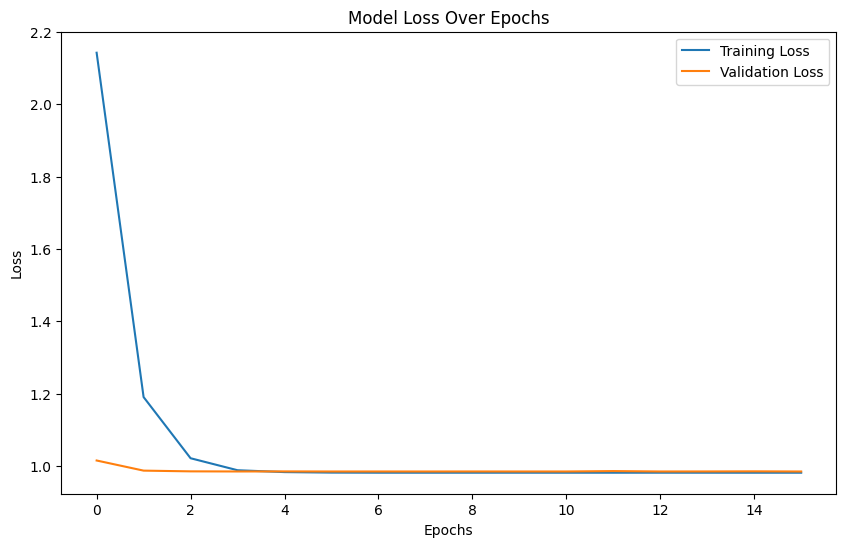

In [5]:

import matplotlib.pyplot as plt

# Plotting the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

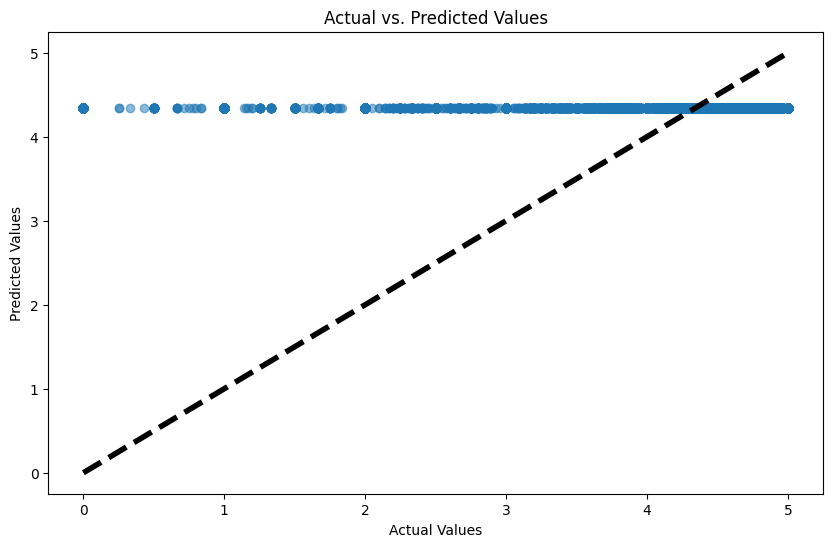

In [6]:
# Assuming y_test are your actual values and y_pred are your model's predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)  # Diagonal line
plt.show()

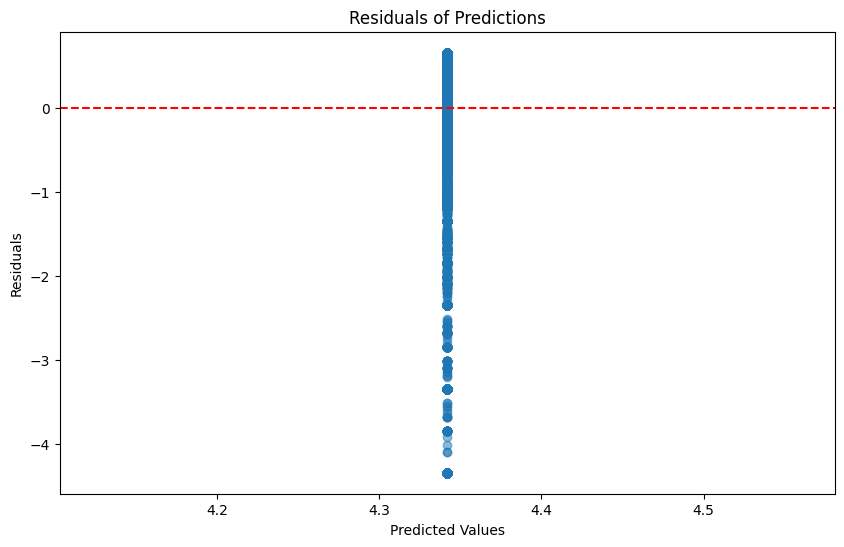

In [7]:
residuals = y_test - y_pred.flatten()

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.title('Residuals of Predictions')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

---------